In [1]:
import tensorflow as tf


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam

In [3]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0

In [4]:
models=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [5]:
models.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [6]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='log/fit',histogram_freq=1)

In [12]:
history=models.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2908 - accuracy: 0.9176 - val_loss: 0.2421 - val_accuracy: 0.9325
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2552 - accuracy: 0.9274 - val_loss: 0.2178 - val_accuracy: 0.9383
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2296 - accuracy: 0.9348 - val_loss: 0.2007 - val_accuracy: 0.9437
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2092 - accuracy: 0.9412 - val_loss: 0.1833 - val_accuracy: 0.9483
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1920 - accuracy: 0.9471 - val_loss: 0.1706 - val_accuracy: 0.9528
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1796 - accuracy: 0.9499 - val_loss: 0.1586 - val_accuracy: 0.9551
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1669 - accuracy: 0.9530 - val_loss: 0.1498 - val_ac

In [8]:
load_ext tensorboard

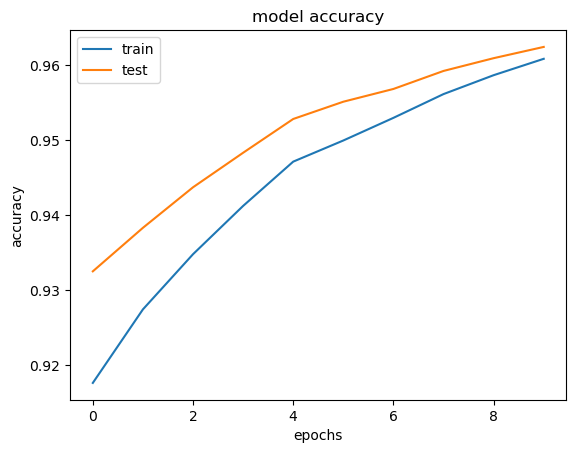

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

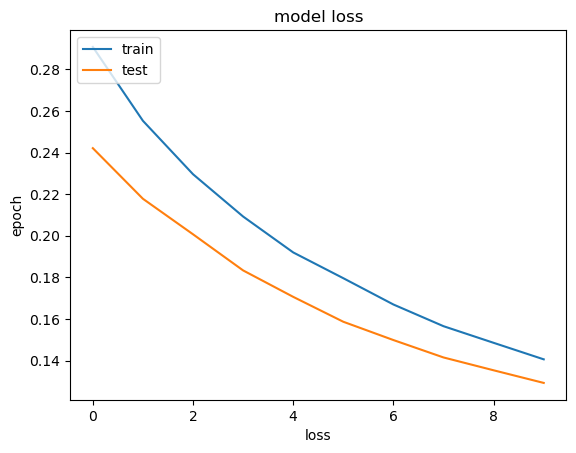

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('epoch')
plt.xlabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()